Missing fabio module. Please install it if you need open some tiff images from the sCMOS camera
LaueToolsProjectFolder ../lauetools/LaueTools
you are using python 3


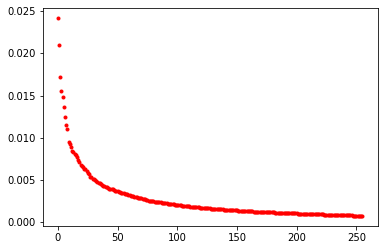

In [2]:
import sys
sys.path.append("..")
import os

import lauetools.LaueTools.IOimagefile as IOimage

import matplotlib.pyplot as plt
import numpy as np
from scipy import fft

def reduce(im, sx, sy, lp, hp):
    SX, SY = im.shape
    im_ = im.reshape(sx, SX // sx, sy,SY // sy).mean(-1).mean(1)
    #ss=cv2.dct(im_)
    ss=fft.dctn(im_)
    ss[:lp, :] = 0.
    ss[:, :lp] = 0.
    ss[hp:, :] = 0.
    ss[:, hp:] = 0.
    #return cv2.idct(ss), ss[lp: hp, lp: hp].ravel()
    return fft.idctn(ss), ss[lp: hp, lp: hp].ravel()

features=np.load('features4096.npy')

features=features.reshape((64*146,4096))

from sklearn.decomposition import PCA

n_pca=256
pca = PCA(n_components=n_pca, svd_solver='randomized')

pca_features=pca.fit_transform(features)#components_

plt.plot(np.arange(n_pca), pca.explained_variance_ratio_,'r.')


In [9]:
from sklearn.cluster import KMeans

n_clusters_=200

labels = KMeans(n_clusters=n_clusters_, init='k-means++').fit_predict(pca_features)

grains=np.array(labels).reshape((64,146))

colors=np.random.uniform(size=(n_clusters_,3))

im=np.zeros(tuple(list(grains.shape)+[3]))

for i in range(64):
    for j in range(146):
        im[i,j]=colors[grains[i,j]]



True

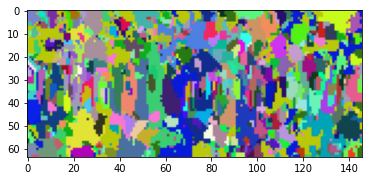

In [10]:
import cv2

img=im.copy()
img=np.rint(img*256).astype(np.uint8)
plt.imshow(img)
cv2.imwrite("K200.tiff", img)

In [12]:
n_clusters_=250

labels = KMeans(n_clusters=n_clusters_, init='k-means++').fit_predict(pca_features)

grains=np.array(labels).reshape((64,146))

colors=np.random.uniform(size=(n_clusters_,3))

im=np.zeros(tuple(list(grains.shape)+[3]))

for i in range(64):
    for j in range(146):
        im[i,j]=colors[grains[i,j]]


True

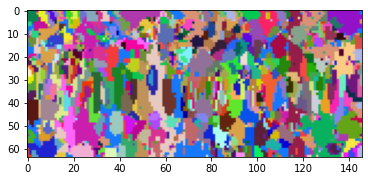

In [13]:
import cv2

img=im.copy()
img=np.rint(img*256).astype(np.uint8)
plt.imshow(img)
cv2.imwrite("K250.tiff", img)

In [23]:
from sklearn.metrics import silhouette_score, silhouette_samples

ks=np.arange(90,330,20)
sqeuclidean=[]
euclidean=[]
for i in range(len(ks)):
    labels = KMeans(n_clusters=ks[i], init='k-means++').fit_predict(pca_features)
    sqeuclidean.append(silhouette_score(pca_features, labels, metric='sqeuclidean'))
    euclidean.append(silhouette_score(pca_features, labels, metric='euclidean'))


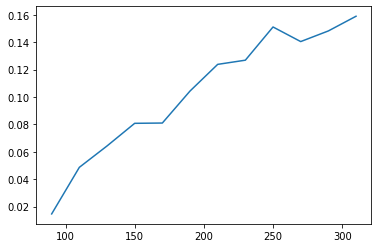

In [24]:
plt.plot(ks,sqeuclidean)

In [26]:
ks=np.arange(330,730,20)
sqeuclidean=[]
euclidean=[]
for i in range(len(ks)):
    labels = KMeans(n_clusters=ks[i], init='k-means++').fit_predict(pca_features)
    sqeuclidean.append(silhouette_score(pca_features, labels, metric='sqeuclidean'))
    euclidean.append(silhouette_score(pca_features, labels, metric='euclidean'))

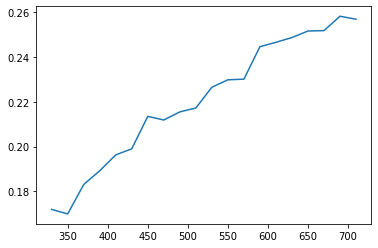

In [27]:
plt.plot(ks,sqeuclidean)

In [28]:
ks=np.arange(730,1030,20)
sqeuclidean=[]
euclidean=[]
for i in range(len(ks)):
    labels = KMeans(n_clusters=ks[i], init='k-means++').fit_predict(pca_features)
    sqeuclidean.append(silhouette_score(pca_features, labels, metric='sqeuclidean'))
    euclidean.append(silhouette_score(pca_features, labels, metric='euclidean'))

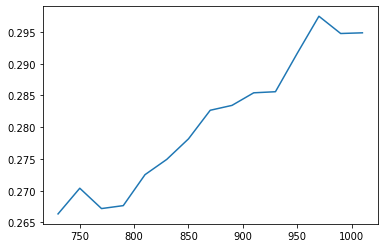

In [29]:
plt.plot(ks,sqeuclidean)

[11 11  5 ... 10  2  8]


(array([ 12., 115., 111.,  95.,  81.,   0.,  81.,  73.,  63.,  59.,  45.,
          0.,  35.,  22.,  22.,  29.,  22.,   0.,  18.,  14.,  10.,   9.,
          8.,   0.,   9.,   3.,   5.,  10.,   5.,   0.,   4.,   4.,   4.,
          4.,   3.,   0.,   2.,   0.,   1.,   5.,   1.,   0.,   3.,   2.,
          2.,   1.,   2.,   0.,   1.,   1.,   2.,   1.,   0.,   0.,   0.,
          2.,   1.,   1.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,   0.,
          0.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([ 1.               ,  1.83             ,  2.66             ,
         3.49             ,  4.32             ,  5.149999999999999,
         5.98             ,  6.81             ,  7.64             ,
         8.469999999999999,  9.299999999999999, 10.129999999999999,
        10.959999999999999, 11.79             

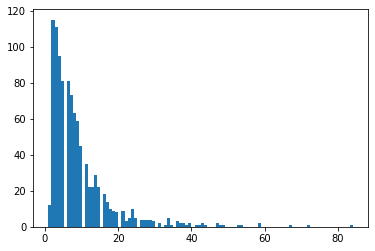

In [35]:
counts = np.unique(labels, return_counts=True)[1]
#for i in range(1020):
#    counts[i]=labels.c
print(counts)
plt.hist(counts,bins=100)

In [40]:
for i in range(1,counts.max()):
    print(len(np.where(counts==i)[0]))

12
115
111
95
81
81
73
63
59
45
35
22
22
29
22
18
14
10
9
8
9
3
5
10
5
4
4
4
4
3
2
0
1
5
1
3
2
2
1
2
1
1
2
1
0
0
2
1
1
0
0
0
1
1
0
0
0
0
2
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
